# **Analyzing Road Accidents in the US**

Dataset - https://www.kaggle.com/sobhanmoosavi/us-accidents

Library to import Dataset from Kaggle directly

https://pypi.org/project/opendatasets/

How to get your kaggle API key?

Step 1: Sign Up

Step 2: Go to Settings --> Account --> Scroll till you see API

Step 3: Click on New API Token and save it in your working directory, by working directory here I mean the directory where the script is located also do not rename it and save it as it is, otherwise you'll need to manually enter the details, currently the opendatasets library picks it up itself.

Step 4: If you are on Colab then upload this kaggle.json file to colab or else add the credentials manually



In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [ ]:
data_filename = './us-accidents/US_Accidents_Dec20_Updated.csv'

# **Forming a Dataframe from the data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


# Getting a general overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


[How to get the numerical columns?](https://www.google.com/search?q=how+to+choose+pandas+columns+based+on+datatype&oq=how+to+choose+pandas+columns+based+on+datatype&aqs=chrome..69i57.665j0j1&sourceid=chrome&ie=UTF-8)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

In [ ]:
numerics = ['int64', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

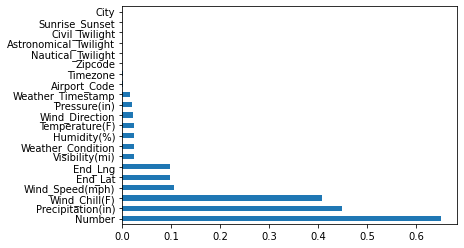

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Google Again!!

[How to plot beautiful python graphs](https://www.google.com/search?q=how+to+plot+beautiful+python+graphs&oq=how+to+plot+beautiful+python+graphs&aqs=chrome..69i57.555j0j9&sourceid=chrome&ie=UTF-8)

https://towardsdatascience.com/plotting-with-python-c2561b8c0f1f

[how to plot barplot using seaborn](https://www.google.com/search?q=how+to+plot+barplot+using+seaborn&oq=how+to+plot+barplot+using+seaborn&aqs=chrome..69i57j0i22i30l2.5339j0j1&sourceid=chrome&ie=UTF-8)

In [ ]:
import seaborn as sns

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


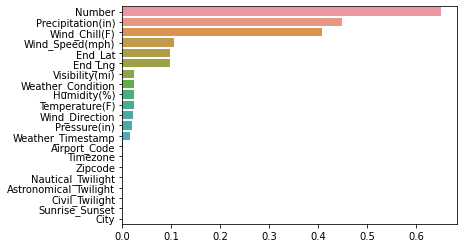

In [ ]:
sns.barplot(missing_percentages[missing_percentages != 0].values, missing_percentages[missing_percentages != 0].index, orient = 'h')

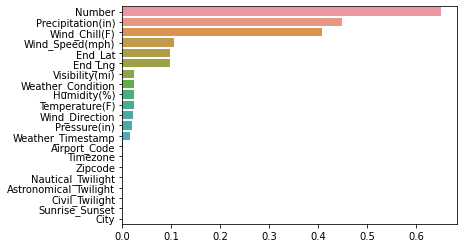

In [ ]:
sns.barplot(x = missing_percentages[missing_percentages != 0].values, y = missing_percentages[missing_percentages != 0].index, orient = 'h')

# Which Colums have missing data?

In [ ]:
missing_percentages[missing_percentages != 0].values

array([6.50817275e-01, 4.47712627e-01, 4.07298881e-01, 1.05677404e-01,
       9.73026997e-02, 9.73026997e-02, 2.47979605e-02, 2.47198627e-02,
       2.45199734e-02, 2.31279738e-02, 2.18378111e-02, 1.95788221e-02,
       1.61414844e-02, 2.27343882e-03, 1.18006888e-03, 3.83264353e-04,
       3.78447745e-05, 3.78447745e-05, 3.78447745e-05, 3.78447745e-05,
       3.71566877e-05])

In [ ]:
missing_percentages[missing_percentages != 0].index

Index(['Number', 'Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)',
       'End_Lat', 'End_Lng', 'Visibility(mi)', 'Weather_Condition',
       'Humidity(%)', 'Temperature(F)', 'Wind_Direction', 'Pressure(in)',
       'Weather_Timestamp', 'Airport_Code', 'Timezone', 'Zipcode',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Civil_Twilight',
       'Sunrise_Sunset', 'City'],
      dtype='object')

# **Let's get to Data Analysis**

Observations based on City


In [ ]:
df.City

0                Greenville
1                 Charlotte
2                 Los Gatos
3               Carson City
4           Fort Lauderdale
                 ...       
2906605             Houston
2906606              Colton
2906607               Miami
2906608      Salt Lake City
2906609    Colorado Springs
Name: City, Length: 2906610, dtype: object

In [ ]:
cities = df.City.unique()
len(cities)

11790

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
                 ...  
Keytesville          1
Dilley               1
Nags Head            1
Hubbardsville        1
Noxen                1
Name: City, Length: 11789, dtype: int64

In [ ]:
cities_by_accident[:5]

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
Name: City, dtype: int64

[plot pandas](https://www.google.com/search?q=plot+pandas&oq=plot+pandas&aqs=chrome.0.0j69i59j0l3j69i60l3.1380j0j4&sourceid=chrome&ie=UTF-8)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

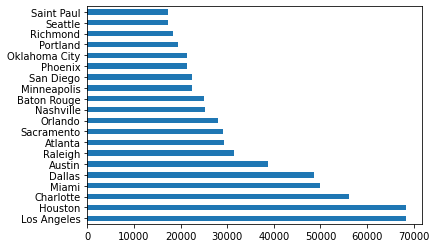

In [ ]:
cities_by_accident[:20].plot(kind='barh')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


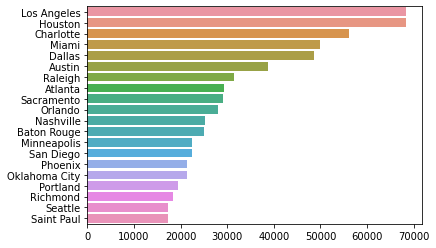

In [ ]:
sns.barplot(cities_by_accident[:20].values, cities_by_accident[:20].index, orient = 'h')

Trying out plotly

[plot bar graph plotly](https://www.google.com/search?q=plot+bar+graph+plotly&oq=plot+bar+graph+plotly&aqs=chrome.0.0j0i22i30j69i60.2946j0j9&sourceid=chrome&ie=UTF-8)

https://plotly.com/python/bar-charts/

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(go.Bar(
            x=cities_by_accident[:20].values,
            y=cities_by_accident[:20].index,
            orientation='h'))

fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=cities_by_accident[:20].values,
            y=cities_by_accident[:20].index,
            orientation='h',
            marker_color='rgb(100, 30, 100)'))

fig.show()

In [ ]:
sns.set_style("darkgrid")

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

https://seaborn.pydata.org/generated/seaborn.histplot.html

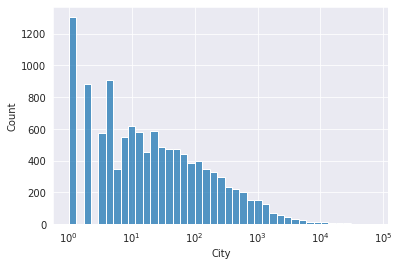

In [ ]:
sns.histplot(cities_by_accident, log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident == 1]

Ranchita         1
Tariffville      1
Ruthven          1
Berlin Center    1
Kathryn          1
                ..
Keytesville      1
Dilley           1
Nags Head        1
Hubbardsville    1
Noxen            1
Name: City, Length: 1306, dtype: int64

In [ ]:
cities_by_accident[cities_by_accident > 40000]

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
Name: City, dtype: int64

Observations Based on Timings

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html


In [ ]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time

0         2019-05-21 08:29:55
1         2019-10-07 17:43:09
2         2020-12-13 21:53:00
3         2018-04-17 16:51:23
4         2016-08-31 17:40:49
                  ...        
2906605   2018-06-28 08:49:01
2906606   2019-01-10 02:01:01
2906607   2020-11-23 12:52:00
2906608   2019-12-29 22:38:00
2906609   2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: datetime64[ns]

In [ ]:
df.Start_Time.dt.hour

0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

https://seaborn.pydata.org/generated/seaborn.distplot.html

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



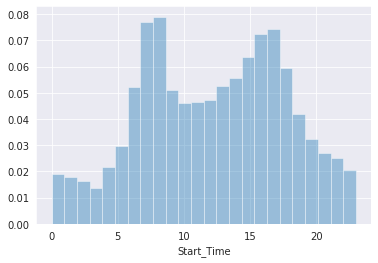

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

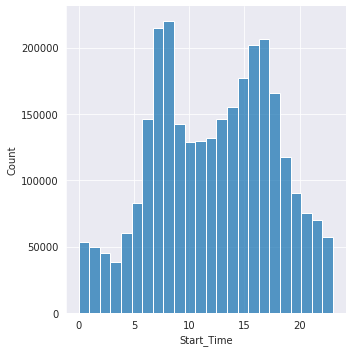

In [ ]:
sns.displot(df.Start_Time.dt.hour, bins=24, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



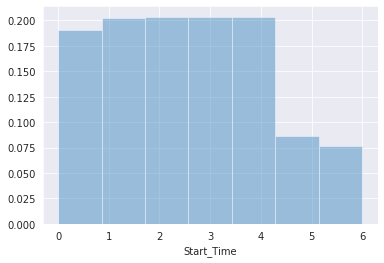

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



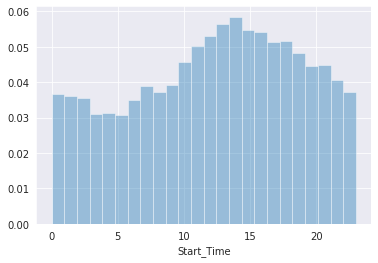

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



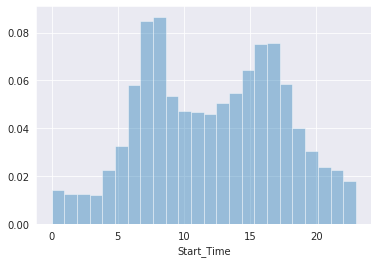

In [ ]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

In [ ]:
df.Start_Time.dt.dayofweek == 0

# **Using Latitude and Longitude**

In [ ]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [ ]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

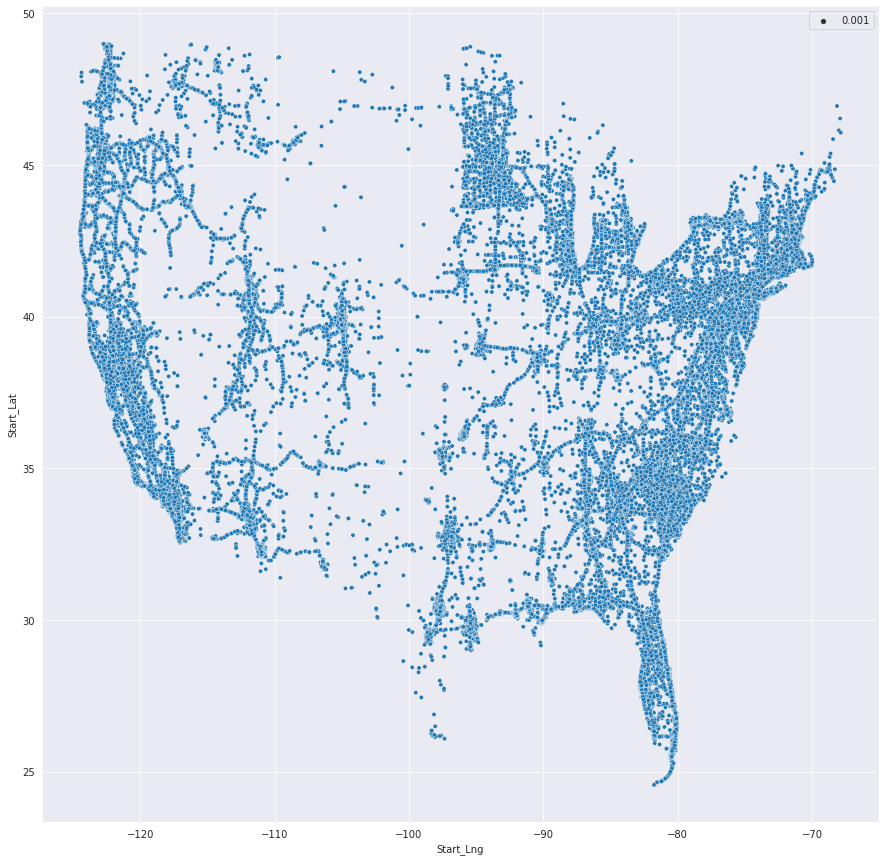

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

https://pypi.org/project/folium/0.1.5/

In [ ]:
!pip install folium --upgrade --quiet
import folium

     |████████████████████████████████| 102kB 3.9MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.12.1 which is incompatible.


In [ ]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(34.808868, -82.26915699999998)

In [ ]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

1962097    35.964530
2892351    34.072277
1068421    29.421918
761379     33.927581
283521     44.884653
             ...    
2101850    37.323190
921289     29.653542
2780895    38.940809
320472     33.895970
956967     40.895191
Name: Start_Lat, Length: 100, dtype: float64
1962097    -83.934860
2892351   -118.053642
1068421    -82.577898
761379    -118.254295
283521     -93.063063
              ...    
2101850   -121.892030
921289     -95.550156
2780895    -77.205732
320472    -118.051000
956967     -74.052299
Name: Start_Lng, Length: 100, dtype: float64


In [ ]:
zip(list(df.Start_Lat), list(df.Start_Lng))

https://python-visualization.github.io/folium/plugins.html

In [ ]:
from folium.plugins import HeatMap

In [ ]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

# ***Are there more accidents in warmer or colder areas?***

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df['Temperature(F)'].describe()

count    2.839386e+06
mean     6.098873e+01
std      1.845258e+01
min     -8.900000e+01
25%      4.890000e+01
50%      6.300000e+01
75%      7.500000e+01
max      2.030000e+02
Name: Temperature(F), dtype: float64

**Hot:   84-99 F (29-37.5 C), We're going to replace this as 2**

**Warm:  70-84 F (21-29 C), We're going to replace this as 1**

**Cool:  55-69 F (13-21 C), We're going to replace this as 0**


In [ ]:
df_temp = df['Temperature(F)'].copy()

In [ ]:
df_temp

0          76.0
1          76.0
2          51.0
3          53.6
4          84.2
           ... 
2906605    84.2
2906606    46.9
2906607    76.0
2906608    27.0
2906609    51.1
Name: Temperature(F), Length: 2906610, dtype: float64

In [ ]:
df_temp[df_temp < 69] = 0 

In [ ]:
df_temp

0          76.0
1          76.0
2           0.0
3           0.0
4          84.2
           ... 
2906605    84.2
2906606     0.0
2906607    76.0
2906608     0.0
2906609     0.0
Name: Temperature(F), Length: 2906610, dtype: float64

In [ ]:
df_temp[(df_temp < 84) & (df_temp != 0)] = 1 

In [ ]:
df_temp

0           1.0
1           1.0
2           0.0
3           0.0
4          84.2
           ... 
2906605    84.2
2906606     0.0
2906607     1.0
2906608     0.0
2906609     0.0
Name: Temperature(F), Length: 2906610, dtype: float64

In [ ]:
df_temp[(df_temp != 0) & (df_temp != 1)] = 2

In [ ]:
df_temp

0          1.0
1          1.0
2          0.0
3          0.0
4          2.0
          ... 
2906605    2.0
2906606    0.0
2906607    1.0
2906608    0.0
2906609    0.0
Name: Temperature(F), Length: 2906610, dtype: float64

In [ ]:
df_tempvals = df_temp.value_counts()

In [ ]:
dict(df_tempvals)

{0.0: 1763754, 1.0: 788833, 2.0: 354023}

In [ ]:
labels = ['Cool', 'Warm', 'Hot']

In [ ]:
values = list(df_tempvals)

In [ ]:
values

[1763754, 788833, 354023]

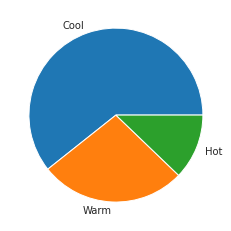

In [ ]:
import matplotlib.pyplot as plt

plt.pie(values, labels=labels)
plt.show()

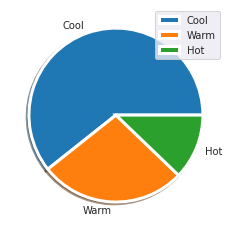

In [ ]:
plt.pie(values, labels=labels, wedgeprops = {'linewidth': 3}, shadow = True)
plt.legend(labels)
plt.show()

## Which 5 states have the highest number of accidents?

In [ ]:
df_state = df.State

In [ ]:
df_statevals = df_state.value_counts()

In [ ]:
df_statevals.head(10)

CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
SC    120462
OR     98352
PA     89745
VA     89730
MN     79712
Name: State, dtype: int64

## Does New York show up in the data? If yes, why is the count lower if this the most populated city.

In [ ]:
df.City

0                Greenville
1                 Charlotte
2                 Los Gatos
3               Carson City
4           Fort Lauderdale
                 ...       
2906605             Houston
2906606              Colton
2906607               Miami
2906608      Salt Lake City
2906609    Colorado Springs
Name: City, Length: 2906610, dtype: object

In [ ]:
df_city = df.City

In [ ]:
df_cityvals = df_city.value_counts()

In [ ]:
df_cityvals

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
                 ...  
Keytesville          1
Dilley               1
Nags Head            1
Hubbardsville        1
Noxen                1
Name: City, Length: 11789, dtype: int64

In [ ]:
df_cityvals['New York']

7328

## Among the top 100 cities in number of accidents, which states do they belong to most frequently

In [ ]:
df_acc_an = df[['City', 'State']].copy()

In [ ]:
df_acc_an

,City,State
0,Greenville,SC
1,Charlotte,NC
2,Los Gatos,CA
3,Carson City,NV
4,Fort Lauderdale,FL
...,...,...
2906605,Houston,TX
2906606,Colton,CA
2906607,Miami,FL
2906608,Salt Lake City,UT


In [ ]:
# dict_c_s = {}

In [ ]:
# for i,j in zip(df_acc_an['City'], df_acc_an['State']):
#     if j in dict_c_s.keys():
#         if i in dict_c_s[j].keys():
#             dict_c_s[j][i] += 1
#         else:
#             dict_c_s[j][i] = 1
#     else:
#         dict_c_s[j] = {}
#         dict_c_s[j][i] = 1

In [ ]:
# dict_c_s

In [ ]:
dict_s_c = {}
for i,j in zip(df_acc_an['City'], df_acc_an['State']):
    if i in dict_s_c.keys():
        pass
    else:
        dict_s_c[i] = j

In [ ]:
dict_s_c

{'Greenville': 'SC',
 'Charlotte': 'NC',
 'Los Gatos': 'CA',
 'Carson City': 'NV',
 'Fort Lauderdale': 'FL',
 'Rifle': 'CO',
 'Whittier': 'CA',
 'Franklin': 'TN',
 'Valencia': 'CA',
 'Dover': 'FL',
 'Yonkers': 'NY',
 'Garland': 'TX',
 'Tucson': 'AZ',
 'Oakland': 'NJ',
 'Houston': 'TX',
 'Los Angeles': 'CA',
 'Fontana': 'CA',
 'Saint Clair Shores': 'MI',
 'Hopewell Junction': 'NY',
 'Atlanta': 'GA',
 'Fuquay Varina': 'NC',
 'Daleville': 'VA',
 'Martinez': 'CA',
 'North Charleston': 'SC',
 'Austin': 'TX',
 'Seal Beach': 'CA',
 'Cedar Springs': 'MI',
 'Miami': 'FL',
 'Corfu': 'NY',
 'Indianapolis': 'IN',
 'Baton Rouge': 'LA',
 'Grand Terrace': 'CA',
 'Providence Forge': 'VA',
 'Tempe': 'AZ',
 'Pittsford': 'NY',
 'Pittsburgh': 'PA',
 'Sacramento': 'CA',
 'Latham': 'NY',
 'Homosassa': 'FL',
 'Fort Worth': 'TX',
 'Redding': 'CA',
 'Downey': 'CA',
 'Minneapolis': 'MN',
 'Lake Worth': 'FL',
 'Grand Rapids': 'MI',
 'Aldrich': 'MN',
 'Richmond': 'IN',
 'North Highlands': 'CA',
 'Dublin': 'OH',
 

In [ ]:
df_cityvals[:100]

Los Angeles        68411
Houston            68265
Charlotte          56176
Miami              49965
Dallas             48525
                   ...  
Sarasota            4336
Pensacola           4287
West Palm Beach     4224
Hollywood           4175
Baltimore           4175
Name: City, Length: 100, dtype: int64

In [ ]:
dict_counter = {}

In [ ]:
for i in df_cityvals[:100].index:
    if dict_s_c[i] in dict_counter.keys():
        dict_counter[dict_s_c[i]] += 1
    else:
        dict_counter[dict_s_c[i]] = 1

In [ ]:
dict_counter

{'AL': 1,
 'AZ': 3,
 'CA': 24,
 'CO': 1,
 'DC': 1,
 'FL': 13,
 'GA': 2,
 'IL': 1,
 'IN': 2,
 'KS': 1,
 'KY': 1,
 'LA': 3,
 'MD': 1,
 'MI': 3,
 'MN': 2,
 'MO': 1,
 'NC': 2,
 'NE': 1,
 'NJ': 2,
 'NY': 5,
 'OH': 4,
 'OK': 2,
 'OR': 1,
 'PA': 3,
 'SC': 5,
 'TN': 4,
 'TX': 6,
 'UT': 1,
 'VA': 2,
 'WA': 1,
 'WI': 1}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



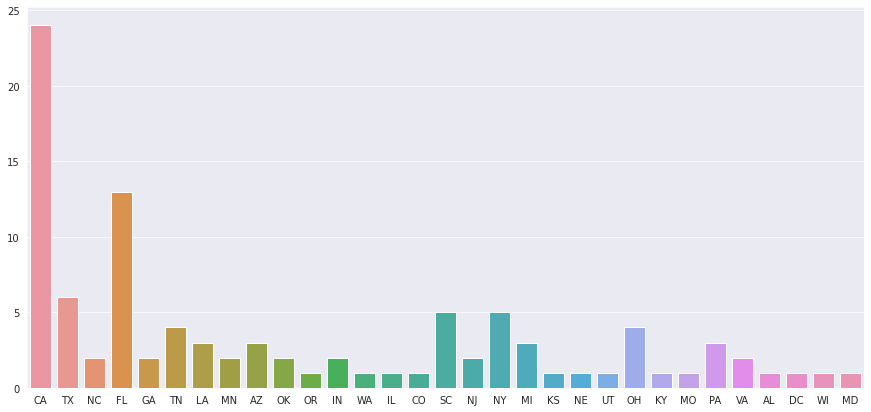

In [ ]:
import seaborn as sns
plt.figure(figsize=[15,7])
sns.barplot(list(dict_counter.keys()), list(dict_counter.values()))

## Which days of the week have the most accidents?

In [ ]:
df.Start_Time.dt.dayofweek

0          1
1          0
2          6
3          1
4          2
          ..
2906605    3
2906606    3
2906607    0
2906608    6
2906609    0
Name: Start_Time, Length: 2906610, dtype: int64

In [ ]:
df.Start_Time.dt.dayofweek.value_counts()

2    507292
4    506750
3    505811
1    504308
0    475111
5    215791
6    191547
Name: Start_Time, dtype: int64

In [ ]:
sorted_dict = {k:v for k,v in sorted(df.Start_Time.dt.dayofweek.value_counts().items())}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



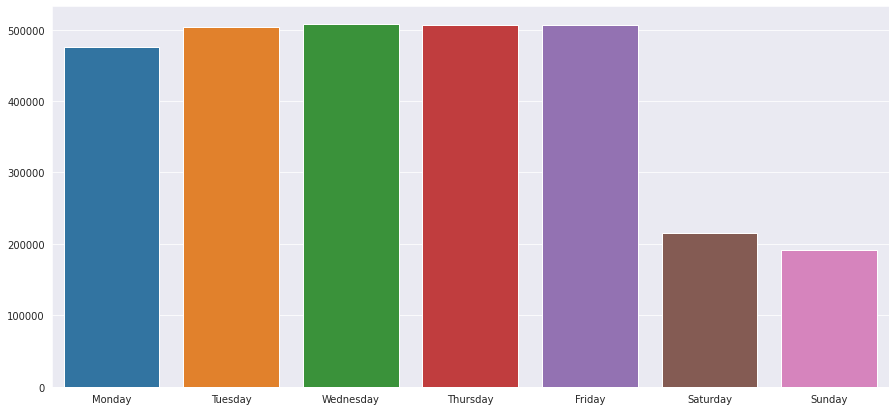

In [ ]:
import seaborn as sns
plt.figure(figsize=[15,7])
sns.barplot(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], list(sorted_dict.values()))

## Which months have the most accidents?

In [ ]:
df.Start_Time.dt.month

0           5
1          10
2          12
3           4
4           8
           ..
2906605     6
2906606     1
2906607    11
2906608    12
2906609     3
Name: Start_Time, Length: 2906610, dtype: int64

In [ ]:
sorted_dict_months = {k:v for k,v in sorted(df.Start_Time.dt.month.value_counts().items())}

In [ ]:
sorted_dict_months

{1: 198485,
 2: 186660,
 3: 197969,
 4: 205487,
 5: 204889,
 6: 214558,
 7: 157112,
 8: 196597,
 9: 255159,
 10: 326430,
 11: 360169,
 12: 403095}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



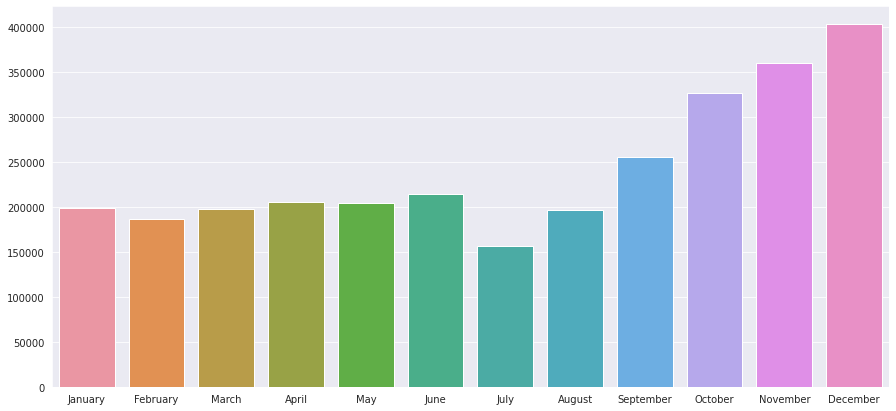

In [ ]:
import seaborn as sns
import calendar
plt.figure(figsize=[15,7])
sns.barplot([calendar.month_name[i] for i in list(sorted_dict_months.keys())], list(sorted_dict_months.values()))

## What is the trend of accidents year over year (decreasing/increasing?)

In [ ]:
df.Start_Time.dt.year.value_counts()

2020    1033828
2019     617712
2018     535921
2017     448268
2016     270881
Name: Start_Time, dtype: int64

In [ ]:
sorted_dict_years = {k:v for k,v in sorted(df.Start_Time.dt.year.value_counts().items())}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



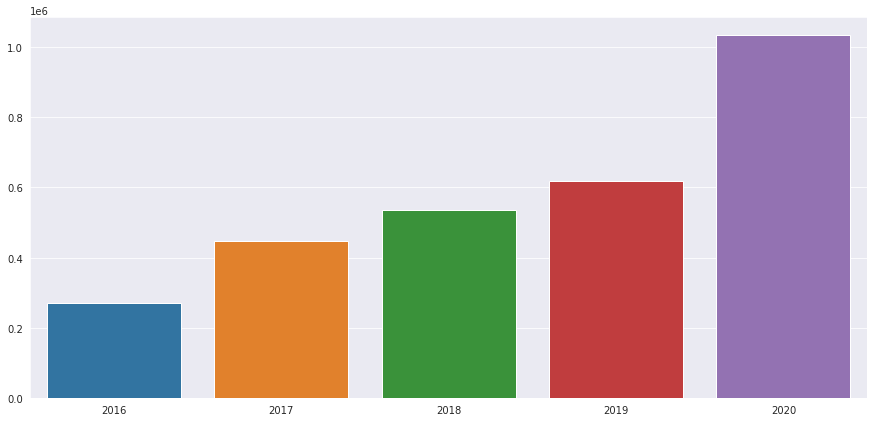

In [ ]:
import seaborn as sns
import calendar
plt.figure(figsize=[15,7])
sns.barplot(list(sorted_dict_years.keys()), list(sorted_dict_years.values()))

## Which Side are Accidents much More Likely?

In [ ]:
df.Side.value_counts()

R    2409662
L     496947
           1
Name: Side, dtype: int64

## Road Visibility at Time of Accident?

https://www.mankatofreepress.com/news/ask-us-heres-what-10-mile-visibility-means-to-weather-guys/article_60e0c194-0ddf-11e8-a461-0b5828972e14.html#:~:text=So%2C%2010%2Dmile%2Dvisibility,source%22%20that's%2010%20miles%20away.

In [ ]:
df['Visibility(mi)']

0          10.0
1          10.0
2          10.0
3          10.0
4          10.0
           ... 
2906605     9.0
2906606    10.0
2906607    10.0
2906608    10.0
2906609    10.0
Name: Visibility(mi), Length: 2906610, dtype: float64

In [ ]:
df['Visibility(mi)'].value_counts()

10.0     2260327
7.0        87566
9.0        75270
8.0        60090
5.0        56646
          ...   
3.2            1
19.0           1
54.0           1
101.0          1
130.0          1
Name: Visibility(mi), Length: 81, dtype: int64

In [ ]:
sorted_dict_vis = {k:v for k,v in sorted(df['Visibility(mi)'].value_counts().items())}

In [ ]:
sorted_dict_vis

{0.0: 2065,
 0.06: 109,
 0.1: 786,
 0.12: 525,
 0.19: 5,
 0.2: 7635,
 0.25: 7394,
 0.38: 81,
 0.4: 60,
 0.5: 12369,
 0.6: 56,
 0.63: 63,
 0.7: 6,
 0.75: 4882,
 0.8: 5271,
 0.88: 46,
 0.9: 29,
 0.99: 8,
 1.0: 29211,
 1.1: 36,
 1.2: 4083,
 1.4: 20,
 1.5: 6960,
 1.6: 18,
 1.8: 5231,
 1.9: 27,
 2.0: 40205,
 2.2: 63,
 2.5: 11562,
 2.8: 78,
 3.0: 44457,
 3.2: 1,
 3.5: 17,
 3.7: 2,
 4.0: 45793,
 4.2: 9,
 4.5: 1,
 5.0: 56646,
 5.5: 15,
 6.0: 51126,
 6.2: 2,
 7.0: 87566,
 8.0: 60090,
 9.0: 75270,
 10.0: 2260327,
 10.5: 20,
 11.0: 107,
 12.0: 242,
 13.0: 3168,
 14.0: 4,
 15.0: 2320,
 19.0: 1,
 20.0: 2238,
 22.0: 4,
 25.0: 384,
 30.0: 2187,
 34.0: 2,
 35.0: 124,
 36.0: 2,
 40.0: 1248,
 43.0: 1,
 45.0: 244,
 47.0: 2,
 50.0: 1502,
 54.0: 1,
 58.0: 1,
 60.0: 135,
 63.0: 1,
 67.0: 1,
 70.0: 174,
 75.0: 55,
 76.0: 2,
 80.0: 126,
 90.0: 7,
 100.0: 12,
 101.0: 1,
 110.0: 1,
 111.0: 1,
 120.0: 5,
 130.0: 1,
 140.0: 2}

## Bumps, Crossings etc. at Time of Accident?

In [ ]:
df.Bump.value_counts()

False    2906031
True         579
Name: Bump, dtype: int64

In [ ]:
df.Give_Way.value_counts()

False    2898390
True        8220
Name: Give_Way, dtype: int64

In [ ]:
df.Crossing.value_counts()

False    2687681
True      218929
Name: Crossing, dtype: int64

In [ ]:
df.Junction.value_counts()

False    2630533
True      276077
Name: Junction, dtype: int64

# Saving as CSV

In [ ]:
df_temp.to_csv('tester.csv')